In [ ]:
### Curso de Python para Finanças Quantitativas

#### Aula 12 - Simulação de Monte Carlo e Drawdowns
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

Como pré requisito para esta aula, assista a aula Introdução – Simulação de Monte Carlo - Outspoken Market
https://youtu.be/bpz9I1gngWI

____________________________________________________

In [1]:
# Carregando as bibliotecas

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import yfinance as yf

[*********************100%***********************]  1 of 1 completed


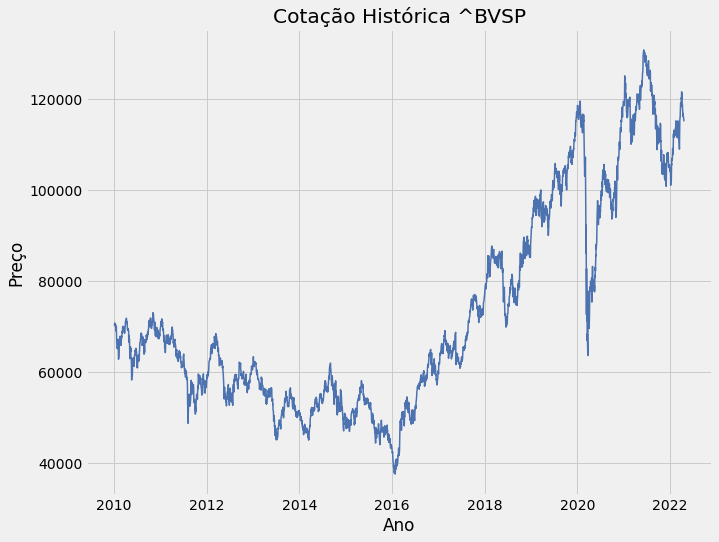

In [2]:
# Carregando a base de dados e fazendo os checks iniciais

plt.style.use("fivethirtyeight")
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

# Carrega a base
ticker = "^BVSP"
inicio = "2010-01-01"
fim = datetime.today().strftime("%Y-%m-%d")
df1 = yf.download(ticker, inicio, fim)

with plt.style.context("seaborn-deep"):
    plt.figure(figsize = (10, 8))
    plt.plot(df1["Adj Close"], linewidth = 1.5)
    plt.xlabel("Ano")
    plt.ylabel("Preço")
    plt.title("Cotação Histórica " + ticker)

In [3]:
# Calculando os retornos diários, dentro e fora do dataframe

df1["Retorno"] = df1["Adj Close"].pct_change(1)

retornos = df1["Adj Close"].pct_change(1).dropna().to_numpy()

In [4]:
retornos

array([ 0.00278392,  0.00696185, -0.0039305 , ..., -0.00513778,
       -0.00426056, -0.00544573])

In [5]:
# Vamos considerar 3 anos para frente e que 1 ano tenha 252 dias úteis 

anos = 3
num_dias = anos * 252
ultimo_preco = float(df1["Adj Close"].tail(1))

In [6]:
ultimo_preco

115057.0

In [37]:
# E vamos calcular o drawdown máximo

# Simula os retornos diários dos próximos 3 anos
sim_ret = np.random.choice(retornos, size = num_dias, replace = True)

# Faz o cálculo do valor da carteira com retorno composto
sim_val = ultimo_preco*(1 + sim_ret).cumprod()

# Calcula o valor máximo da carteira simulada
max_val = np.maximum.accumulate(sim_val)

# Encontra o drawdown máximo
max_dd = np.max((max_val - sim_val)/max_val)

max_dd

0.2944294210202456

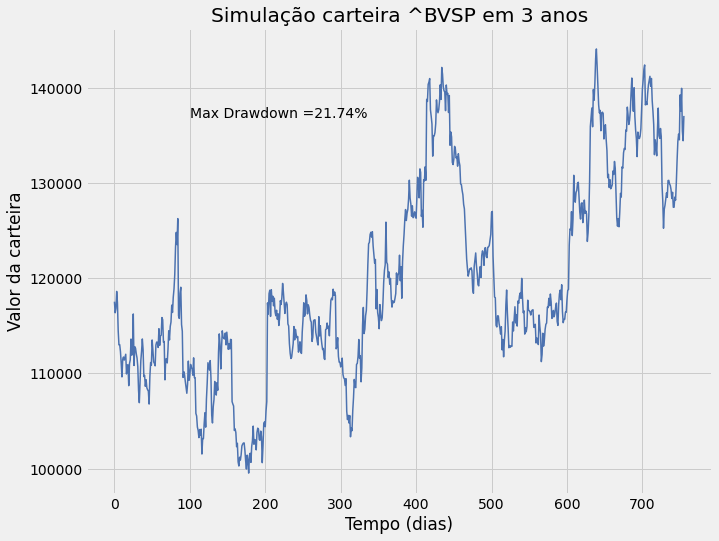

In [20]:
# Visualização da simulação do valor da carteira

with plt.style.context("seaborn-deep"):
    plt.figure(figsize = (10, 8))
    plt.plot(sim_val, linewidth = 1.5)
    plt.xlabel("Tempo (dias)")
    plt.ylabel("Valor da carteira")
    plt.annotate("Max Drawdown =" + str(round(max_dd*100, 2)) + "%", (100, np.max(sim_val)*0.95))
    plt.title("Simulação carteira " + ticker + " em " + str(anos) + " anos")

In [54]:
# Vamos ao Monte Carlo com X simulações 

num_sim = 100000

dd = np.array([])

for n in range(num_sim): # basta colocar a lógica anterior dentro de um laço for
    # Simula os retornos diários dos próximos 3 anos
    sim_ret = np.random.choice(retornos, size = num_dias, replace = True)

    # Faz o cálculo do valor da carteira com retorno composto
    sim_val = ultimo_preco*(1 + sim_ret).cumprod()

    # Calcula o valor máximo da carteira simulada
    max_val = np.maximum.accumulate(sim_val)

    # Encontra o drawdown máximo
    max_dd = np.max((max_val - sim_val)/max_val)
    dd = np.append(dd, max_dd)

In [44]:
dd

array([0.29189756, 0.32293119, 0.4821935 , 0.38821425, 0.21875325,
       0.2849644 , 0.50981197, 0.20369374, 0.24808591, 0.47868926,
       0.40218691, 0.40414376, 0.23413945, 0.53345311, 0.25963928,
       0.42636973, 0.48732891, 0.18924934, 0.56526313, 0.22849574,
       0.27676304, 0.55864169, 0.38678178, 0.25493197, 0.486992  ,
       0.53178651, 0.25469771, 0.27968714, 0.2329173 , 0.29607574,
       0.44791452, 0.39211863, 0.37978183, 0.44946833, 0.44620116,
       0.31615424, 0.33835735, 0.57771356, 0.40244753, 0.25886364,
       0.44931268, 0.28109019, 0.25706791, 0.4212622 , 0.26697699,
       0.19760968, 0.56752324, 0.72524938, 0.28556662, 0.35513006,
       0.278138  , 0.24496445, 0.2523316 , 0.32391904, 0.24785071,
       0.49777785, 0.23091401, 0.47014965, 0.22182279, 0.31049266,
       0.27727273, 0.41407477, 0.13490759, 0.52154121, 0.36362669,
       0.52615662, 0.34291691, 0.40666962, 0.52477609, 0.1130854 ,
       0.42372419, 0.31757388, 0.43225367, 0.25950298, 0.40751

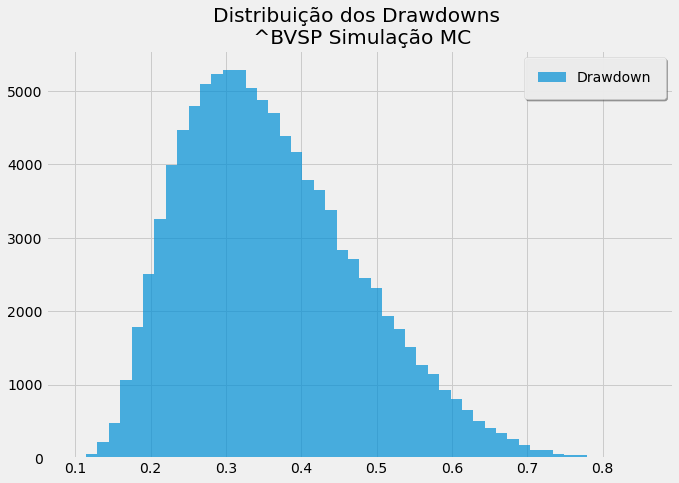

In [55]:
# Vamos visualizar a distribuição dos drawdowns

config = dict(histtype = "stepfilled", alpha = 0.7, density = False, bins = 50)

plt.figure(figsize = (10,7))
plt.hist(dd, **config, label = "Drawdown")

# Formataçao da legenda - Valida para qualquer tipo de grafico
plt.legend(loc = "upper right"
           , frameon = True
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1)
plt.title("Distribuição dos Drawdowns \n " + ticker + " Simulação MC");

In [56]:
# Por fim, as estatísticas importantes

print("Para o ativo " + ticker + " segundo uma simulação de Monte Carlo,")
print("com " + str(num_sim) + " simulações, em " + str(anos) + " anos podemos esperar:")
print()
print("---------------------------------------------------------")
print("Drawdown médio " + str(round(np.mean(dd*100), 2)) + "%")
print()
print("Com: ")
print("    50% de probabilidade, o DD será maior do que " + str(round(np.median(dd*100), 2)) + "%")
print("    25% de probabilidade, o DD será maior do que " + str(round(np.percentile(dd*100, 75), 2)) + "%")
print("     5% de probabilidade, o DD será maior do que " + str(round(np.percentile(dd*100, 95), 2)) + "%")
print("---------------------------------------------------------")
print()
print("Período dos parâmetros para a simulação: " + inicio  + " à " + fim)

Para o ativo ^BVSP segundo uma simulação de Monte Carlo,
com 100000 simulações, em 3 anos podemos esperar:

---------------------------------------------------------
Drawdown médio 36.12%

Com: 
    50% de probabilidade, o DD será maior do que 34.55%
    25% de probabilidade, o DD será maior do que 43.55%
     5% de probabilidade, o DD será maior do que 57.63%
---------------------------------------------------------

Período dos parâmetros para a simulação: 2010-01-01 à 2022-04-20
